In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df[df['bmi'].isna()] 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [7]:
df.dropna(inplace = True) 

In [8]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df['gender'] = df['gender'].replace(['Male', 'Female'], [0,1])

In [10]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,0,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
df['ever_married'].value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [12]:
df['ever_married'] = df['ever_married'].replace(['Yes', 'No'], [1,0])

In [13]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,children,Rural,103.08,18.6,Unknown,0
5106,44873,1,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,0,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 498.6+ KB


In [16]:
df.drop(df[df.gender=='Other'].index, inplace=True)

In [17]:
df['gender'] = pd.to_numeric(df['gender'])  

In [18]:
df['gender'].value_counts() 

1    2897
0    2011
Name: gender, dtype: int64

In [19]:
df = pd.get_dummies(df, prefix="") 

In [20]:
df

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,_Govt_job,_Never_worked,_Private,_Self-employed,_children,_Rural,_Urban,_Unknown,_formerly smoked,_never smoked,_smokes
0,9046,0,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,0,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,1,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,1,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0
5,56669,0,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,103.08,18.6,0,0,0,0,0,1,1,0,1,0,0,0
5106,44873,1,81.0,0,0,1,125.20,40.0,0,0,0,0,1,0,0,1,0,0,1,0
5107,19723,1,35.0,0,0,1,82.99,30.6,0,0,0,0,1,0,1,0,0,0,1,0
5108,37544,0,51.0,0,0,1,166.29,25.6,0,0,0,1,0,0,1,0,0,1,0,0


<AxesSubplot:xlabel='bmi', ylabel='Count'>

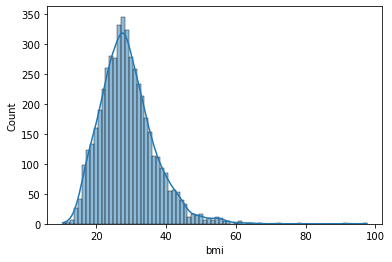

In [21]:
sns.histplot(x="bmi", data=df, kde=True)

<AxesSubplot:>

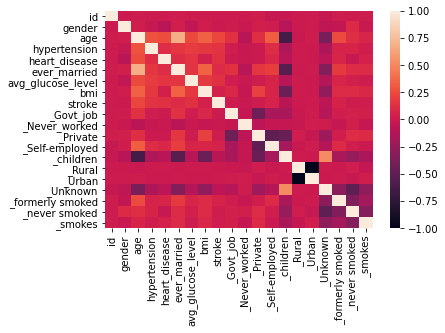

In [22]:
sns.heatmap(df.corr())

In [23]:
df.drop(['id'], axis = 1, inplace = True)

In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,_Govt_job,_Never_worked,_Private,_Self-employed,_children,_Rural,_Urban,_Unknown,_formerly smoked,_never smoked,_smokes
0,0,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
2,0,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,1,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,1,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0
5,0,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,103.08,18.6,0,0,0,0,0,1,1,0,1,0,0,0
5106,1,81.0,0,0,1,125.20,40.0,0,0,0,0,1,0,0,1,0,0,1,0
5107,1,35.0,0,0,1,82.99,30.6,0,0,0,0,1,0,1,0,0,0,1,0
5108,0,51.0,0,0,1,166.29,25.6,0,0,0,1,0,0,1,0,0,1,0,0


In [25]:
X = df.copy().drop(['stroke'], axis = 1) 

In [26]:
X

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,_Govt_job,_Never_worked,_Private,_Self-employed,_children,_Rural,_Urban,_Unknown,_formerly smoked,_never smoked,_smokes
0,0,67.0,0,1,1,228.69,36.6,0,0,1,0,0,0,1,0,1,0,0
2,0,80.0,0,1,1,105.92,32.5,0,0,1,0,0,1,0,0,0,1,0
3,1,49.0,0,0,1,171.23,34.4,0,0,1,0,0,0,1,0,0,0,1
4,1,79.0,1,0,1,174.12,24.0,0,0,0,1,0,1,0,0,0,1,0
5,0,81.0,0,0,1,186.21,29.0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,103.08,18.6,0,0,0,0,1,1,0,1,0,0,0
5106,1,81.0,0,0,1,125.20,40.0,0,0,0,1,0,0,1,0,0,1,0
5107,1,35.0,0,0,1,82.99,30.6,0,0,0,1,0,1,0,0,0,1,0
5108,0,51.0,0,0,1,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0


In [27]:
Y = df.copy()['stroke'] 

In [28]:
Y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4908, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_X, test_X, train_y, test_y = train_test_split(X, Y)

In [31]:
train_X.shape, test_X.shape 

((3681, 18), (1227, 18))

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(18,), activation = 'relu'),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Softmax()])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 38        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 6         
_________________________________________________________________
softmax_5 (Softmax)          (None, 2)                 0         
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [49]:
model.fit(train_X, train_y, epochs = 20, validation_split=0.2, verbose=1)

Epoch 1/20
92/92 [==============================] - 1s 3ms/step - loss: 0.7035 - accuracy: 0.4806 - val_loss: 0.6932 - val_accuracy: 0.8304
Epoch 2/20
92/92 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.7973 - val_loss: 0.6932 - val_accuracy: 0.7870
Epoch 3/20
92/92 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.7702 - val_loss: 0.6931 - val_accuracy: 0.7286
Epoch 4/20
92/92 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.7673 - val_loss: 0.6931 - val_accuracy: 0.7544
Epoch 5/20
92/92 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.7801 - val_loss: 0.6931 - val_accuracy: 0.7463
Epoch 6/20
92/92 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.7720 - val_loss: 0.6931 - val_accuracy: 0.7436
Epoch 7/20
92/92 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.7697 - val_loss: 0.6931 - val_accuracy: 0.7028
Epoch 8/20
92/92 [==

In [50]:
model.evaluate(test_X, test_y) 

39/39 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8085


[0.6931471228599548, 0.8084759712219238]